In [40]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [42]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

#Jawaban
result = data.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary=('Salary', 'min'),
    median_salary=('Salary', 'median'),
    max_salary=('Salary', 'max'),
    average_salary=('Salary', 'mean')
)
print(result)

                 min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [43]:
df = data.groupby('TermReason').agg(total_termination = ('TermReason', 'count'))
df.sort_values(by = 'total_termination',ascending = False).head()

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [44]:
#Jawaban
df = data[data['PerformanceScore'] == 'Exceeds']
df.groupby('RecruitmentSource').agg(total_recruit = ('PerformanceScore', 'count')).sort_values(by = 'total_recruit', ascending = False).head(7)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [45]:
#Jawaban
data.groupby('Department').agg({'ManagerName': 'nunique'})

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [46]:
#Jawaban
data.groupby('Sex')['Termd'].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

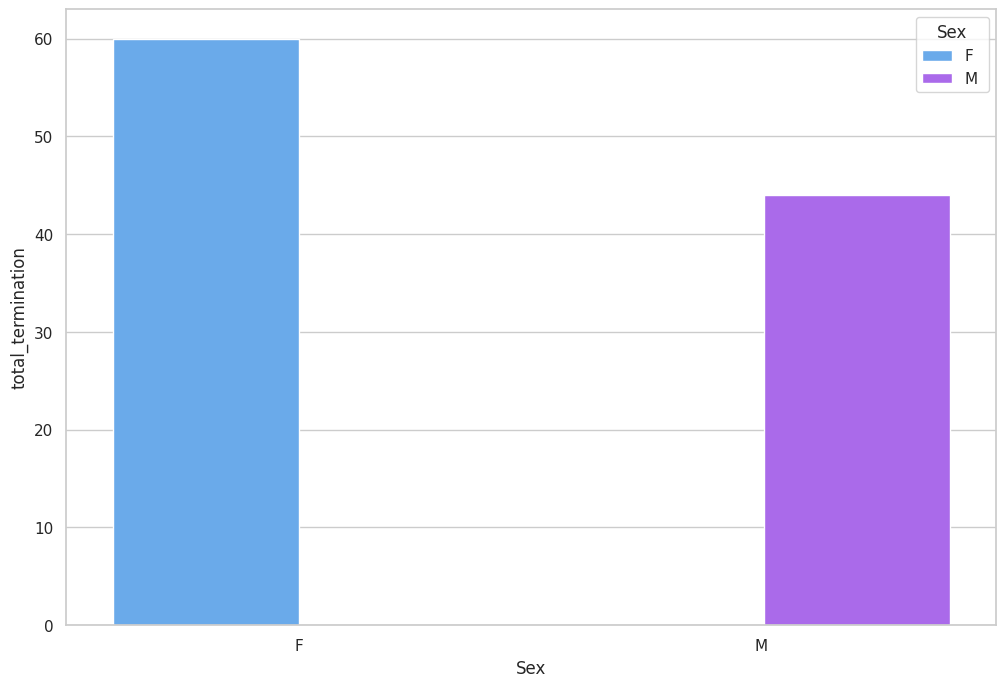

In [47]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

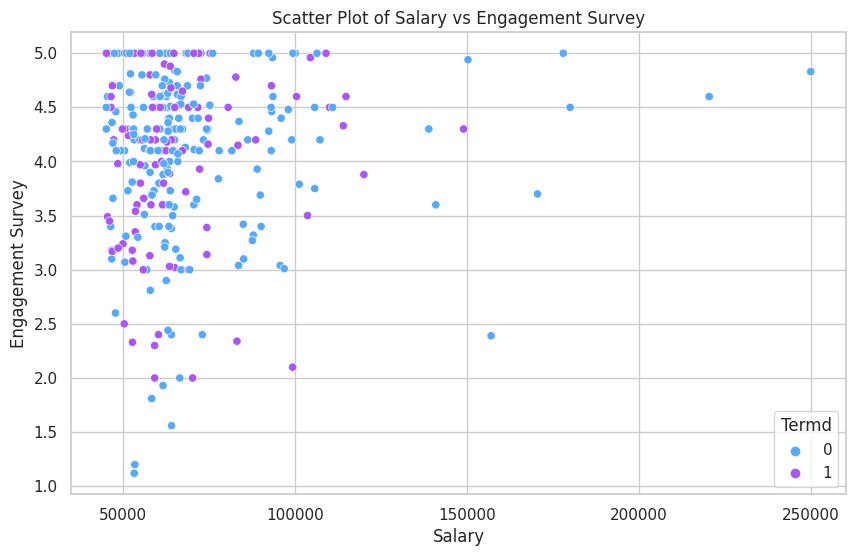

In [72]:
# Scatter plot dengan warna berdasarkan kolom 'Termd'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data, palette='cool')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of Salary vs Engagement Survey')
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')

# Menampilkan legenda
plt.legend(title='Termd')

# Menampilkan plot
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

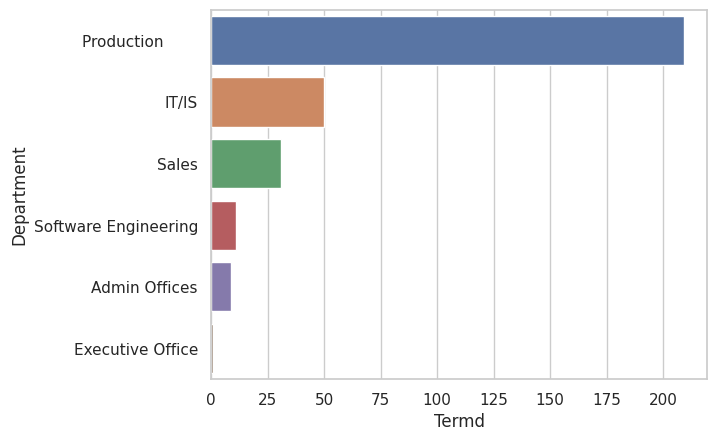

In [49]:
df[df['Termd'] == 1]
department_order = data['Department'].value_counts().index
sns.countplot(data=data, y='Department', order=department_order)
plt.xlabel('Termd')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

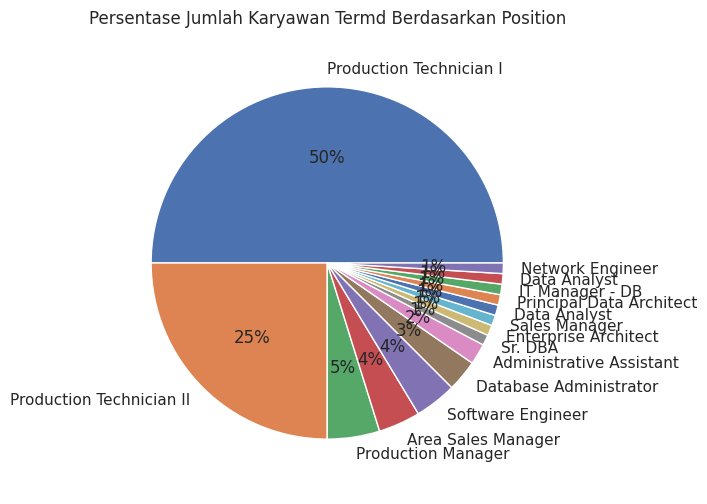

In [50]:
# Menghitung jumlah Termd dan Not Termd berdasarkan Position
termination_counts = data[data['Termd'] == 1]['Position'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(5, 6))

# Membuat Pie Chart dengan hasil persentase dibulatkan
plt.pie(termination_counts, labels=termination_counts.index, autopct='%1.0f%%', startangle=360)

# Memberi judul
plt.title('Persentase Jumlah Karyawan Termd Berdasarkan Position')

# Menampilkan plot
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

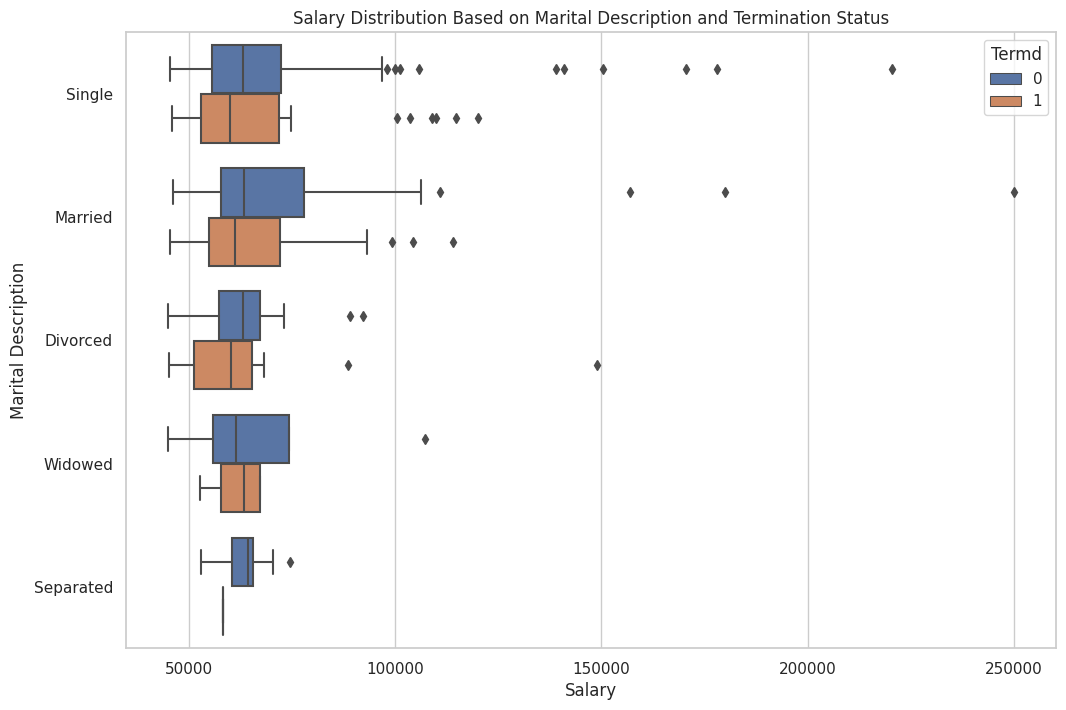

In [51]:
# Mengatur ukuran figure
f, ax = plt.subplots(figsize=(12, 8))

# Membuat Boxplot
ax = sns.boxplot(y='MaritalDesc', x='Salary', hue='Termd', data=data)

# Memberi judul
plt.ylabel('Marital Description')
plt.xlabel('Salary')
plt.title('Salary Distribution Based on Marital Description and Termination Status')

plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


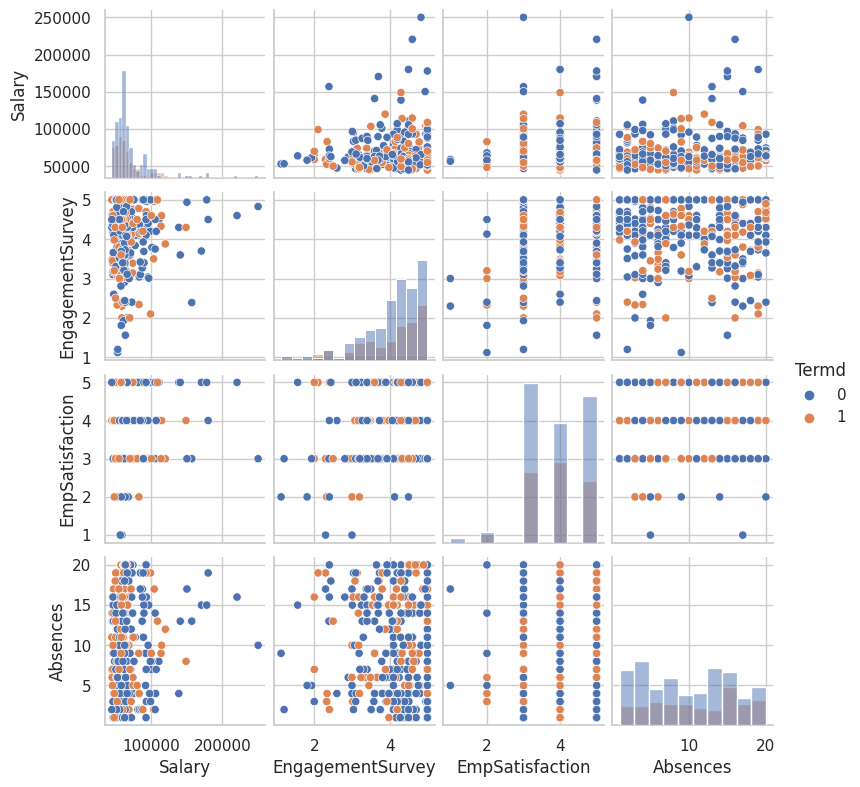

In [52]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=2, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [53]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

# Mengonversi kolom DOB menjadi tipe datetime dengan format yang sesuai
data['DOB_date'] = pd.to_datetime(data['DOB'], format='%m/%d/%y')

# Menghitung umur (Age) dengan mengurangkan tahun kelahiran dari tahun 2022
data['Age'] = 2022 - data['DOB_date'].dt.year

# Menampilkan DataFrame dengan kolom Age yang baru
data[['DOB', 'DOB_date', 'Age']]


,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [54]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)

from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling pada fitur "Salary"
data['Salary_minmax'] = scaler.fit_transform(data[['Salary']])

# Menampilkan DataFrame dengan fitur "Salary" yang telah di-scaling
data[['Salary',	'Salary_minmax']]


,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [55]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

# Mengubah hanya kolom dengan tipe data 'object' menjadi 'category'
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).astype('category')

# Menampilkan tipe data kolom-kolom setelah perubahan
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [56]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom "RecruitmentSource"
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point

# Menggunakan LabelEncoder untuk mengubah kolom "PerformanceScore"
data['PerformanceScore_encoded'] = label_encoder.fit_transform(data['PerformanceScore'])

# Menampilkan DataFrame dengan kolom "RecruitmentSource" yang telah di-encoded
data[['RecruitmentSource','RecruitmentSource_encoded','PerformanceScore','PerformanceScore_encoded']]

,RecruitmentSource,RecruitmentSource_encoded,PerformanceScore,PerformanceScore_encoded
0,LinkedIn,5,Exceeds,0
1,Indeed,4,Fully Meets,1
2,LinkedIn,5,Fully Meets,1
3,Indeed,4,Fully Meets,1
4,Google Search,3,Fully Meets,1
...,...,...,...,...
306,LinkedIn,5,Fully Meets,1
307,Google Search,3,PIP,3
308,Employee Referral,2,Exceeds,0
309,Employee Referral,2,Fully Meets,1


In [57]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Menampilkan variabel independen
X = data[['MarriedID','MaritalStatusID','GenderID', 'DeptID', 'PerfScoreID',
       'PositionID', 'Age', 'RecruitmentSource_encoded', 'PerformanceScore_encoded',
       'Salary_minmax', 'Absences', 'EmpSatisfaction', 'SpecialProjectsCount',
       'EngagementSurvey']]
# Menampilkan variabel independen
X.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource_encoded,PerformanceScore_encoded,Salary_minmax,Absences,EmpSatisfaction,SpecialProjectsCount,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,5,0,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,3,6,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,3,0,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,5,0,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,4,0,5.00


In [58]:
# Variabel dependen (target)
y = data['Termd']

# Menampilkan variabel dependen
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

In [59]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi train set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set shape (x_train, y_train):' , X_train.shape, y_train.shape)
print('Test set shape(x_test, y_test):', X_test.shape, y_test.shape)

Train set shape (x_train, y_train): (248, 14) (248,)
Test set shape(x_test, y_test): (63, 14) (63,)


In [61]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

In [62]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10,random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [63]:
dt_mod = model_dt.predict(X_test)
dt_mod

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [64]:
def dt_model(inputs, targets, name=""):
 pred_dt = model_dt.predict(inputs)
 accuracy_dt = accuracy_score(targets, pred_dt)
 print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
 print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
 print('Recall : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))

 cm = confusion_matrix(targets, pred_dt, normalize='true')
 plt.figure()
 sns.heatmap(cm, annot=True, cmap='YlGn')
 plt.xlabel('Prediction')
 plt.ylabel('Target')
 plt.title('{} Confusion Matrix'.format(name));
 return pred_dt

Accuracy : 99.60%
Precison : 98.80%
Recall : 100.00%


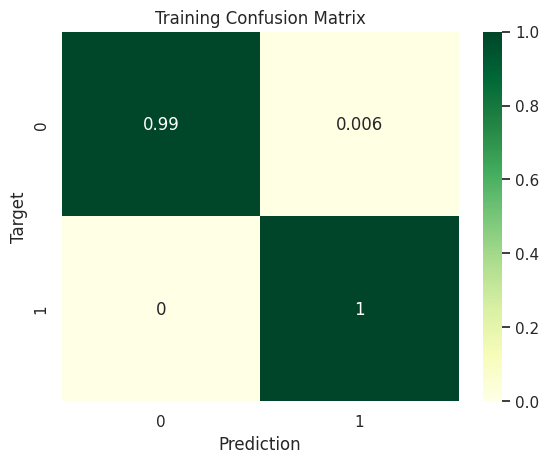

In [65]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

Accuracy : 61.90%
Precison : 45.83%
Recall : 50.00%


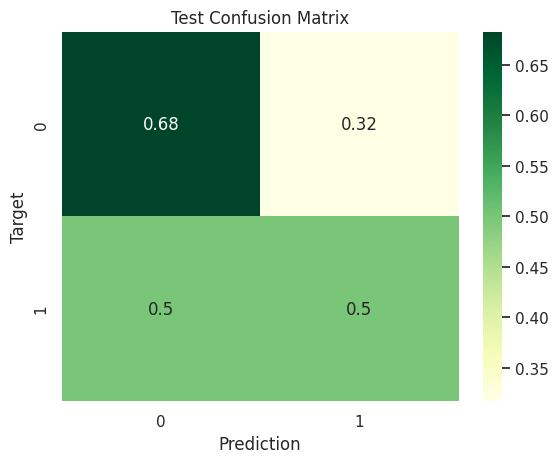

In [66]:
# Prediksi Decision Tree
dt_pred = dt_model(X_test, y_test, 'Test')

In [67]:
accuracy_score(dt_mod, y_test)

0.6190476190476191

In [68]:
# Classification Report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        41
           1       0.46      0.50      0.48        22

    accuracy                           0.62        63
   macro avg       0.59      0.59      0.59        63
weighted avg       0.63      0.62      0.62        63



# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

19. Maybe Yes, cause there is a relationship between who someone's supervisor (manager) is and their performance score. This relationship is influenced by various factors, such as the manager's leadership style, communication, employee development, recognition, and the work environment.
20.To ensure a low ratio of termination such as RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount